In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
import math
import statistics
import h5py
import pickle
import random
from random import randrange

# setup

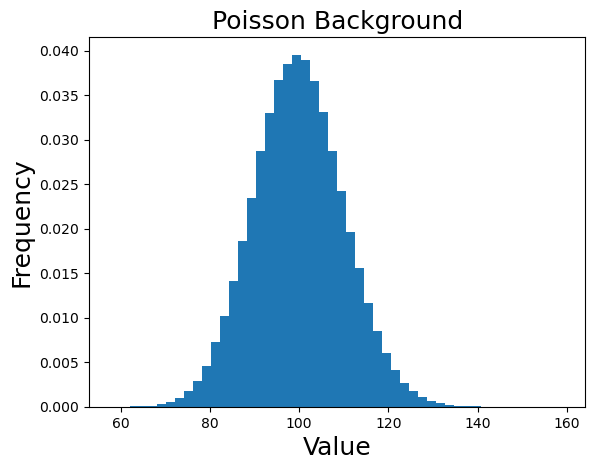

In [235]:
bkgd = np.random.poisson(100,1000000)
plt.hist(bkgd, bins = 50, density = True)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Value', fontsize = 18)
plt.title('Poisson Background', fontsize = 18)

#signal = stats.uniform.rvs(0,200,1000000)
#plt.hist(signal, density = True)
plt.show()

# Problem 1
### The first problem is to look at your background distribution and determine where the 5σ sensitivity threshold is. [Hint, you've done this several times now, look back at the first few labs.]

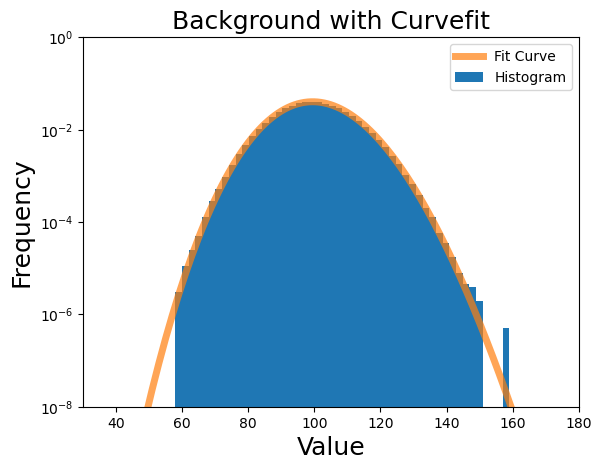

Maximum value for 5sigma: 54.0
Minimum value for 5 sigma: 154.0


In [236]:
plt.hist(bkgd, density = True, bins = 50, label = 'Histogram')
curv = stats.poisson.pmf(range(0,200),100)
plt.plot(range(0,200),curv,linewidth = 5, alpha = 0.7, label = 'Fit Curve')
plt.title('Background with Curvefit', fontsize = 18)
plt.ylabel('Frequency',fontsize = 18)
plt.xlabel('Value', fontsize = 18)
plt.xlim(30,180)
plt.ylim(10e-9,1)
plt.yscale('log')
plt.legend()
plt.show()

prob5sig = 1/3.5e6
leftsig = stats.poisson.ppf(prob5sig, mu = 100)
rightsig = stats.poisson.ppf(1-prob5sig, mu = 100)
print('Maximum value for 5sigma: ' +str(leftsig))
print('Minimum value for 5 sigma: ' +str(rightsig))

# Problem 2
### Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30σ range. Inject this signal into your background data many times.

In [237]:
prob200 = stats.poisson.pmf(200, mu = 100)
sigma200 = -stats.norm.ppf(prob200)
print(sigma200)

#injected signal strength of 200 is greater than an 8sigma value

8.841621416530861


### a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

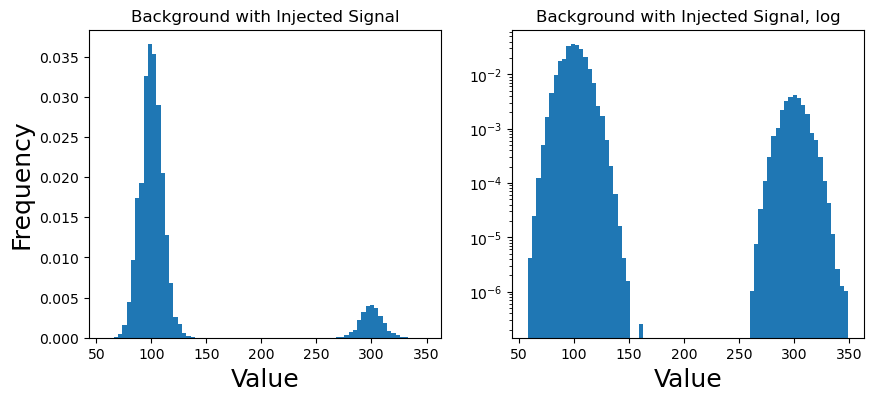

In [238]:
x = np.zeros(1000000)
x[0::10] = 200

fig, ax = plt.subplots(nrows = 1, ncols =2, figsize = (10,4))

data_inj = x + bkgd
ax[0].hist(data_inj, bins = 75, density = True)
ax[0].set_title('Background with Injected Signal')
ax[0].set_ylabel('Frequency',fontsize = 18)
ax[0].set_xlabel('Value',fontsize = 18)

ax[1].hist(data_inj, bins = 75, density = True)
ax[1].set_title('Background with Injected Signal, log')
ax[1].set_yscale('log')
ax[1].set_xlabel('Value',fontsize = 18)
plt.show()

#### The observed signal seems to be brighter than the injected signal by a additional amount equal to the mean of the background. Its shape appears near-gaussian, most likely an equal copy of the background due to the influence of the initial signal on the injected due to summing.

#### This histogram is telling us that the injected signal is adding with the background. This can be understood as the discrete value injected is now measured as having a spectrum of values.

### b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

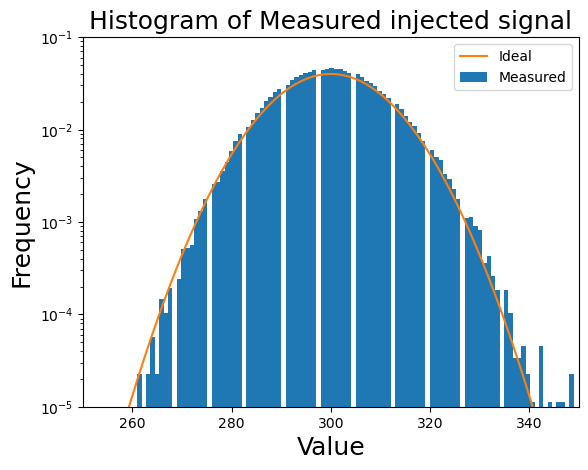

In [239]:
injmeas =(data_inj[data_inj>200])
plt.hist(injmeas, bins = 100, density = True, label = 'Measured')
x = np.linspace(200,400,1000)
m = np.mean(injmeas)
st = np.std(injmeas)
plt.plot(x, stats.norm.pdf(x,loc = m,scale = st), label = 'Ideal' )
plt.yscale('log')
plt.ylim(10e-6,0.1)
plt.xlim(250,350)

plt.title('Histogram of Measured injected signal', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Value', fontsize = 18)
plt.legend()

plt.show()

#### The measured injected signal is very nearly symmetrical. When compared to an ideal gaussian curve, the data can be seen as slighly biased to a stronger signal strength. This is very likely due to the initial background being a Poisson distribution which is not a symmetric distribution.

# Problem 3

### Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5σ (30σ or more). You will want to follow the work you did for Homework 5 very closely.

In [240]:
prob500 = stats.poisson.pmf(500, mu = 100)
sigma500 = -stats.norm.ppf(prob500)
print(sigma500)

signal = np.random.randint(low = 0, high = 500, size = 1000000)
# from 0 to 400, with 1million terms. Spectrum reaching more than 28 sigma

28.442128019534778


### a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data

#### Injecting this signal is simulating a broad spectrum injected signal that evaluates the function from zero to an extremely high sigma value. This allows for to evaluation of any injected signal within that range and the way in which the background interracts with it.

### b) For the same injected signal power as in problem 2, show that you get the same answer.

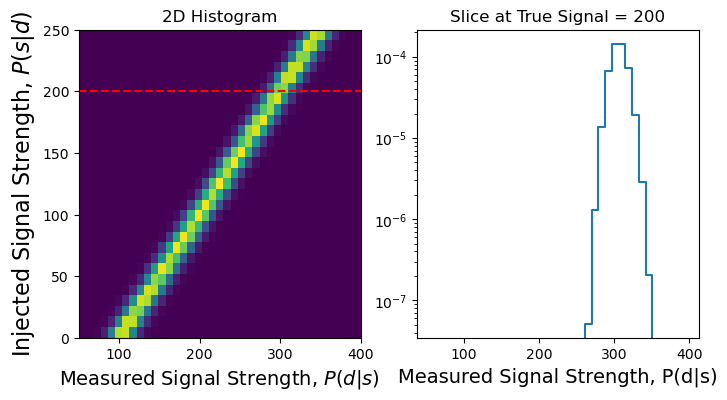

In [256]:
data = bkgd + signal

signaledges = np.linspace(0,250,30)
dataedges = np.linspace(50,400,40)

Psd, temp, temp2 = np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

fig, ax = plt.subplots(nrows = 1, ncols =2, figsize = (8,4))

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
ax[0].pcolormesh(datacenters,signalcenters,Psd.T, shading = 'auto')
ax[0].set_ylabel('Injected Signal Strength, $P(s|d)$', fontsize = 16)
ax[0].set_xlabel('Measured Signal Strength, $P(d|s)$', fontsize = 14)
ax[0].set_title('2D Histogram')

ax[0].axhline(y=200, color='r', linestyle='--')

signalval = 200
index = int(signalval/(250/30))

i = Psd[:,index]
ax[1].step(datacenters, i)
ax[1].set_yscale('log')
ax[1].set_title('Slice at True Signal = '+str(signalval))
ax[1].set_xlabel('Measured Signal Strength, P(d|s)',fontsize = 14)

plt.show()

#### The right plot shows the measured signal after an injected signal of equal strength to problem 2. This distribution is equivalent to a the injected discrete signal at this value.

### c) Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5σ) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.

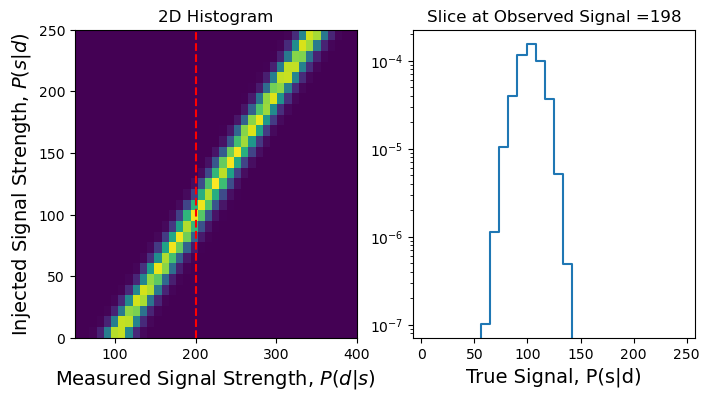

In [279]:
Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

fig, ax = plt.subplots(nrows = 1, ncols =2, figsize = (8,4))

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
ax[0].pcolormesh(datacenters,signalcenters,Psd.T, shading = 'auto')
ax[0].set_ylabel('Injected Signal Strength, $P(s|d)$', fontsize = 14)
ax[0].set_xlabel('Measured Signal Strength, $P(d|s)$', fontsize = 14)
ax[0].set_title('2D Histogram')

ax[0].axvline(x=200, color='r', linestyle='--')

index2 = 17
step=(350/40)
sigval = int(50 + step*index2)
ax[1].step(signalcenters,Psd[index2,:])
ax[1].set_yscale('log')
ax[1].set_title('Slice at Observed Signal =' + str(sigval))
ax[1].set_xlabel('True Signal, P(s|d)', fontsize = 14)


plt.show()

#### The right histogram provides with its mean the value of the original injected signal strength. The width of the peak gives the confidence interval.

### d) For your observed signal, what is the 1σ uncertainty on the true signal strength?

In [301]:
injmeas =(data_inj[data_inj>200])
x = np.linspace(200,400,1000)
m = np.mean(injmeas)

prob1sig = 0.341
left1sig = stats.poisson.ppf(prob1sig, mu = m)
right1sig = stats.poisson.ppf(1-prob1sig, mu = m)

L = m - left1sig
R = right1sig - m
print('Uncertainty left of peak at 1sigma: ' +str(L))
print('Uncertainty right of peak at 1sigma ' + str(R))
print('Difference: ' + str(R-L))

Uncertainty left of peak at 1sigma: 6.999689999999987
Uncertainty right of peak at 1sigma 7.000310000000013
Difference: 0.0006200000000262662


### e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?

#### This is very nearly symmetric. The poisson distribution, which approaches gaussian as the mu value increases, left an impression of near symmetry on our measured distribution of injected signals. This makes sense as the injected signals interract with the background and adopt the background's shape. This makes sense with a poisson distribution as the left side will 'fall off' slightly which is represented by the left side having tighter uncertainty.